```{contents}
```

## AdaBoost Regressor

* **AdaBoost (Adaptive Boosting)** is an ensemble method that combines **multiple weak regressors** (usually shallow decision trees) to build a **strong regression model**.
* Instead of averaging models equally (like Random Forest), AdaBoost assigns **different weights** to each weak learner, focusing more on points that were **harder to predict** in previous iterations.

---

### How it Works (Intuition)

1. **Start with equal weights**

   * Each training sample has the same weight initially.

2. **Train a weak learner** (e.g., Decision Tree Regressor of depth=3).

3. **Compute errors**

   * Instead of classification error rate, we use a **loss function** such as **Mean Squared Error (MSE)**.

4. **Update weights**

   * Data points with **higher errors** get **higher weights**.
   * This forces the next weak learner to focus on the "hard-to-fit" regions of the data.

5. **Combine learners**

   * Each weak regressor gets a weight (`α`) based on its performance.
   * The final prediction is a **weighted sum** of all regressors.

---

### Mathematical Formulation

For regression, AdaBoost minimizes the **exponential loss of residuals**:

$$
L(y, f(x)) = \exp(-\alpha \cdot (y - f(x)))
$$

The final model after $M$ weak regressors is:

$$
F(x) = \sum_{m=1}^{M} \alpha_m \cdot h_m(x)
$$

where

* $h_m(x)$ = prediction of weak regressor $m$,
* $\alpha_m$ = weight of that regressor (higher for more accurate models).

---

### Key Features

* Uses **DecisionTreeRegressor (stumps or shallow trees)** as default base learners.
* Reduces **bias** (by sequentially correcting errors).
* Works well when the data has **nonlinear relationships**.
* Sensitive to **outliers** (since they get higher weights).

---

### Performance Metrics (Evaluation)

Same as any regression model:

* **MSE (Mean Squared Error)**
* **RMSE (Root Mean Squared Error)**
* **MAE (Mean Absolute Error)**
* **R² Score (Explained Variance)**

---

### Example (Workflow)

1. Input dataset → split into train/test.
2. Train AdaBoost Regressor with 100 stumps.
3. At each step → update weights, focus on hard points.
4. Combine weak regressors into final strong predictor.
5. Evaluate with **MSE, MAE, RMSE, R²**.

---

✅ In short: **AdaBoost Regressor = many weak regressors (like small trees) + sequential reweighting of difficult points → strong regression model**.



📊 AdaBoost Regressor Metrics
MSE:  0.026
MAE:  0.131
R²:   0.947


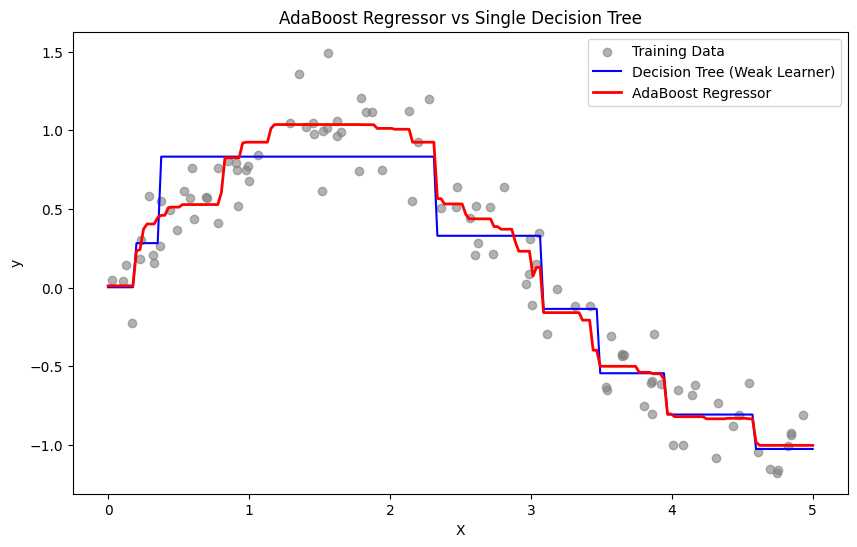

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Generate nonlinear regression dataset (sine wave + noise)
rng = np.random.RandomState(42)
X = np.sort(5 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel() + rng.normal(0, 0.2, X.shape[0])

# 2. Train weak model (single Decision Tree)
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, y)

# 3. Train AdaBoost Regressor (ensemble of trees)
ada_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=50,
    learning_rate=0.5,
    random_state=42
)
ada_reg.fit(X, y)

# 4. Predictions
X_test = np.linspace(0, 5, 200).reshape(-1, 1)
y_tree_pred = tree_reg.predict(X_test)
y_ada_pred = ada_reg.predict(X_test)

# 5. Evaluation metrics
y_pred_train = ada_reg.predict(X)
mse = mean_squared_error(y, y_pred_train)
mae = mean_absolute_error(y, y_pred_train)
r2 = r2_score(y, y_pred_train)

print("📊 AdaBoost Regressor Metrics")
print(f"MSE:  {mse:.3f}")
print(f"MAE:  {mae:.3f}")
print(f"R²:   {r2:.3f}")

# 6. Visualization
plt.figure(figsize=(10,6))
plt.scatter(X, y, c="gray", label="Training Data", alpha=0.6)
plt.plot(X_test, y_tree_pred, color="blue", label="Decision Tree (Weak Learner)")
plt.plot(X_test, y_ada_pred, color="red", linewidth=2, label="AdaBoost Regressor")
plt.legend()
plt.title("AdaBoost Regressor vs Single Decision Tree")
plt.xlabel("X")
plt.ylabel("y")
plt.show()